<a href="https://colab.research.google.com/github/Alexxakiode/Introduction-to-Neural-Network---Diabestes-or-Not-/blob/main/Diabetes%20or%20Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes or Not using Neural Network

0 = Diabetes (Negative)

1= Diabetes (Positive) 

This process is aimed at building and optimising neural network models targeted at finding out if a medical record can predict Diabetes status in a Patient.

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import LeakyReLU
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.optimizers import SGD
from keras.optimizers import gradient_descent_v2


from sklearn import metrics

# set random seeds to get reproducible results
import os
seed = 100
os.environ['PYTHONHASHSEED']=str(seed) 
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Understanding the problem and data set 

Given a data set that contains patient medical records of Pima Indians and whether they had an onset of diabetes within five years. 

Using these data you need to build and optimise a neural
network to predict the possibility to have diabetes.<br>

The diagnosed labels are 0 and 1:

0 = tested negative for diabetes

1= tested positive for diabetes  

### Load and analyse the data set

In [ ]:
diabetes_datafolder = '/content/drive/MyDrive/AppliedAI/Assessment 4/diabetes_data'

In [ ]:
# load training data
diabetes_train = pd.read_csv(os.path.join(diabetes_datafolder, "train.csv"))

# summarise the details
print(f'Number of entries: {len(diabetes_train)}')
diabetes_train.head()

Number of entries: 668


,id,A1,A2,A3,A4,A5,A6,A7,A8,class
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# load testing data
diabetes_test = pd.read_csv(os.path.join(diabetes_datafolder, "test.csv"))

# summarise the details
print(f'Number of entries: {len(diabetes_test)}')
diabetes_test.head()

Number of entries: 100


,id,A1,A2,A3,A4,A5,A6,A7,A8
0,1,6,98,58,33,190,34.0,0.430,43
1,2,9,154,78,30,100,30.9,0.164,45
2,3,6,165,68,26,168,33.6,0.631,49
3,4,1,99,58,10,0,25.4,0.551,21
4,5,10,68,106,23,49,35.5,0.285,47


In [ ]:
diabetes_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      668 non-null    int64  
 1   A1      668 non-null    int64  
 2   A2      668 non-null    int64  
 3   A3      668 non-null    int64  
 4   A4      668 non-null    int64  
 5   A5      668 non-null    int64  
 6   A6      668 non-null    float64
 7   A7      668 non-null    float64
 8   A8      668 non-null    int64  
 9   class   668 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 52.3 KB


In [ ]:
diabetes_train.describe()

,id,A1,A2,A3,A4,A5,A6,A7,A8,class
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,334.500000,3.812874,120.405689,68.748503,20.567365,79.654192,31.860180,0.477329,33.091317,0.345808
std,192.979273,3.365672,32.291473,19.526392,16.020600,115.827750,7.827111,0.341398,11.711386,0.475988
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,167.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.238750,24.000000,0.000000
50%,334.500000,3.000000,116.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,501.250000,6.000000,140.000000,80.000000,32.000000,126.000000,36.500000,0.641250,40.000000,1.000000
max,668.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='class', ylabel='count'>

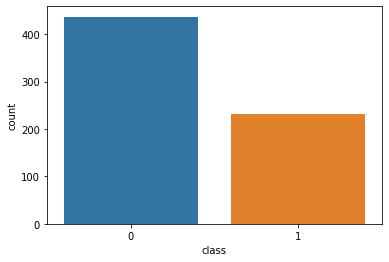

In [ ]:
# Summarise class details
sns.countplot(x=diabetes_train['class'])

## Extracting labels and features

In [ ]:
# extract labels
y = diabetes_train['class']

print(y.value_counts())

0    437
1    231
Name: class, dtype: int64


In [ ]:
# Drop the label and remove unnecessary columns
X = diabetes_train.drop(['id', 'class'], axis=1)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      668 non-null    int64  
 1   A2      668 non-null    int64  
 2   A3      668 non-null    int64  
 3   A4      668 non-null    int64  
 4   A5      668 non-null    int64  
 5   A6      668 non-null    float64
 6   A7      668 non-null    float64
 7   A8      668 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB
None


,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Our class label is already in numeric values ('0' and '1') <br>

## M1 Params

No of features = first 6

No of hidden layers = 1

Classification type = Binary class

Activations: relu, sigmoid

I am selecting the first 6 column features for model 1 trial

In [ ]:
X1 = X.iloc[:, 0:6]
X1.head()

,A1,A2,A3,A4,A5,A6
0,6,148,72,35,0,33.6
1,1,85,66,29,0,26.6
2,8,183,64,0,0,23.3
3,1,89,66,23,94,28.1
4,0,137,40,35,168,43.1


Training and splitting data

In [ ]:
# split data to train and validation sets 70% train and 30% validation
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 467
validation data set size: 201


Building Model 1

In [ ]:
# define the keras model
model1 = keras.Sequential()
model1.add(layers.Dense(12, input_dim=6, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
#sgd = gradient_descent_v2.SGD()
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
history = model1.fit (X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1))

Epoch 1/60
10/10 [==============================] - 2s 54ms/step - loss: 11.6930 - accuracy: 0.6595 - val_loss: 11.1293 - val_accuracy: 0.6418
Epoch 2/60
10/10 [==============================] - 0s 9ms/step - loss: 9.6502 - accuracy: 0.6510 - val_loss: 8.9700 - val_accuracy: 0.6517
Epoch 3/60
10/10 [==============================] - 0s 11ms/step - loss: 7.9147 - accuracy: 0.6552 - val_loss: 7.2972 - val_accuracy: 0.6368
Epoch 4/60
10/10 [==============================] - 0s 14ms/step - loss: 6.4917 - accuracy: 0.6617 - val_loss: 6.0459 - val_accuracy: 0.6070
Epoch 5/60
10/10 [==============================] - 0s 20ms/step - loss: 5.4622 - accuracy: 0.6467 - val_loss: 5.1645 - val_accuracy: 0.5622
Epoch 6/60
10/10 [==============================] - 0s 12ms/step - loss: 4.7275 - accuracy: 0.6424 - val_loss: 4.5038 - val_accuracy: 0.5373
Epoch 7/60
10/10 [==============================] - 0s 15ms/step - loss: 4.1408 - accuracy: 0.6081 - val_loss: 3.8992 - val_accuracy: 0.5124
Epoch 8/60
1

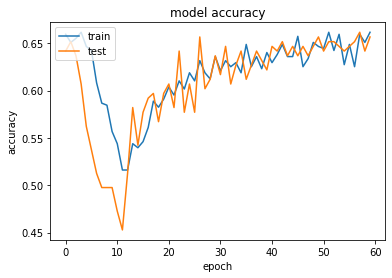

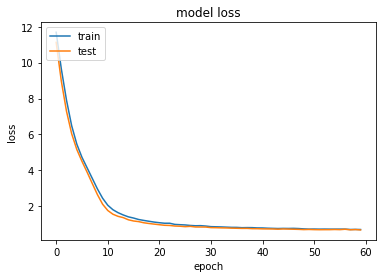

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Model Validation

In [ ]:
# get model predictions
y_pred1 = model1.predict(X_val1)
print(y_pred1[:5])

y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:5])
     

7/7 [==============================] - 0s 11ms/step
[[0.47999853]
 [0.61918795]
 [0.23138909]
 [0.36626345]
 [0.55357456]]
[0, 1, 0, 0, 1]


In [ ]:
# measure accuracy
accuracy1 = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy1}')

Accuracy: 0.6567164179104478


# Test Prediction

In [ ]:
# summarise the details
print(f'Number of entries: {len(diabetes_test)}')

X_test = diabetes_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
X1_test = X_test.iloc[:, 0:6]
X1_test.head()

,A1,A2,A3,A4,A5,A6
0,6,98,58,33,190,34.0
1,9,154,78,30,100,30.9
2,6,165,68,26,168,33.6
3,1,99,58,10,0,25.4
4,10,68,106,23,49,35.5


In [ ]:
test_pred1 = model1.predict(X1_test)
print(test_pred1[:5])

test_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in test_pred1]
print(test_pred_categorical1[:5])

4/4 [==============================] - 0s 4ms/step
[[0.5957333 ]
 [0.33605283]
 [0.33745295]
 [0.31401917]
 [0.31977737]]
[1, 0, 0, 0, 0]


## M2

<!-- As the initial model, let's think about a simple model using 8 features and 2 hidden layers. -->

<!-- ![](https://github.com/HHansi/Applied-AI-Course/blob/main/DL/images/Simple_neural_network.png?raw=true) -->


## M2 Params

No of features = last 4

No of hidden layers = 2

Classification type = Binary class

Activations: relu, relu, sigmoid

I am selecting the last 4 column features for model trial

In [ ]:
X2 = X.iloc[:, 3:7]
X2.head()

,A4,A5,A6,A7
0,35,0,33.6,0.627
1,29,0,26.6,0.351
2,0,0,23.3,0.672
3,23,94,28.1,0.167
4,35,168,43.1,2.288


### Training and splitting data

In [ ]:
# split data to train and validation sets 70% train and 30% validation
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train2)}')
print(f'validation data set size: {len(X_val2)}')

training data set size: 467
validation data set size: 201


### Build Model

In [ ]:
# define the keras model
model2 = keras.Sequential()
model2.add(layers.Dense(16, input_dim=4, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
history = model2.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2))

Epoch 1/60
10/10 [==============================] - 1s 27ms/step - loss: 9.4779 - accuracy: 0.3490 - val_loss: 7.7905 - val_accuracy: 0.3433
Epoch 2/60
10/10 [==============================] - 0s 8ms/step - loss: 5.5484 - accuracy: 0.4261 - val_loss: 3.9488 - val_accuracy: 0.3930
Epoch 3/60
10/10 [==============================] - 0s 6ms/step - loss: 2.2654 - accuracy: 0.4540 - val_loss: 0.8841 - val_accuracy: 0.4925
Epoch 4/60
10/10 [==============================] - 0s 8ms/step - loss: 1.2358 - accuracy: 0.5910 - val_loss: 1.2462 - val_accuracy: 0.6468
Epoch 5/60
10/10 [==============================] - 0s 7ms/step - loss: 1.1604 - accuracy: 0.6210 - val_loss: 0.7921 - val_accuracy: 0.5174
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 0.8229 - accuracy: 0.5139 - val_loss: 0.8154 - val_accuracy: 0.4677
Epoch 7/60
10/10 [==============================] - 0s 8ms/step - loss: 0.7460 - accuracy: 0.5996 - val_loss: 0.7242 - val_accuracy: 0.6517
Epoch 8/60
10/10 [=

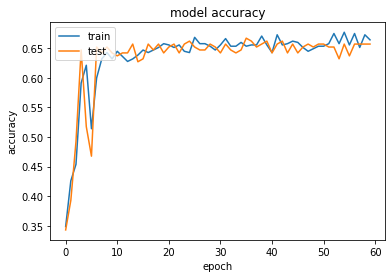

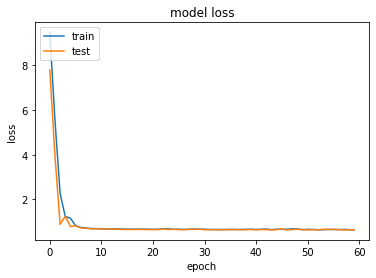

In [ ]:
# plot the history of the training

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Validate Model

Validation accuracy is measured in the previous step too. But let's see how to do it separately.

In [ ]:
# get model predictions
y_pred2 = model2.predict(X_val2)
print(y_pred2[:10])

7/7 [==============================] - 0s 2ms/step
[[0.35036653]
 [0.61221695]
 [0.2979998 ]
 [0.35448337]
 [0.48319262]
 [0.40121698]
 [0.37424555]
 [0.37504795]
 [0.35813475]
 [0.39409372]]


In [ ]:
# convert to categorical predictions
y_pred_categorical2 = [1 if pred > 0.5 else 0 for pred in y_pred2]
print(y_pred_categorical2[:10])

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# measure accuracy
accuracy2 = metrics.accuracy_score(y_val2, y_pred_categorical2)
print(f'Accuracy: {accuracy2}')

Accuracy: 0.6567164179104478


### Test Predictions

In [ ]:
# summarise the details
print(f'Number of entries: {len(diabetes_test)}')

X_test = diabetes_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
X_test2 = X_test.iloc[:, 3:7]
X_test2.head()

,A4,A5,A6,A7
0,33,190,34.0,0.430
1,30,100,30.9,0.164
2,26,168,33.6,0.631
3,10,0,25.4,0.551
4,23,49,35.5,0.285


In [ ]:
test_pred2 = model2.predict(X_test2)
print(test_pred2[:5])

test_pred_categorical2 = [1 if pred > 0.5 else 0 for pred in test_pred2]
print(test_pred_categorical2[:5])


4/4 [==============================] - 0s 3ms/step
[[0.465673  ]
 [0.37473622]
 [0.40551776]
 [0.34709924]
 [0.25295517]]
[0, 0, 0, 0, 0]


## M3

## M3 Params

No of features = all

No of hidden layers = 3

Classification type = Binary class

Activations: relu, relu, relu, sigmoid

Let's build a more complex model with all the 8 major features and more neurons

In [ ]:
X3 = X.iloc[:, 0:8]
X3.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Split Data

In [ ]:
# split data to train and validation sets
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train3)}')
print(f'validation data set size: {len(X_val3)}')

training data set size: 467
validation data set size: 201


### Build Model

In [ ]:
# define the keras model
model3 = keras.Sequential()
model3.add(layers.Dense(32, input_dim=8, activation='relu'))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(8, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model3.fit(X_train3, y_train3, batch_size=50, epochs=60, validation_data=(X_val3, y_val3))

Epoch 1/60
10/10 [==============================] - 2s 36ms/step - loss: 2.8427 - accuracy: 0.3876 - val_loss: 0.8805 - val_accuracy: 0.5622
Epoch 2/60
10/10 [==============================] - 0s 9ms/step - loss: 0.8120 - accuracy: 0.5824 - val_loss: 0.6882 - val_accuracy: 0.6567
Epoch 3/60
10/10 [==============================] - 0s 9ms/step - loss: 0.6900 - accuracy: 0.6381 - val_loss: 0.6701 - val_accuracy: 0.6567
Epoch 4/60
10/10 [==============================] - 0s 11ms/step - loss: 0.6834 - accuracy: 0.6424 - val_loss: 0.6638 - val_accuracy: 0.6667
Epoch 5/60
10/10 [==============================] - 0s 10ms/step - loss: 0.6755 - accuracy: 0.6445 - val_loss: 0.6637 - val_accuracy: 0.6667
Epoch 6/60
10/10 [==============================] - 0s 11ms/step - loss: 0.6708 - accuracy: 0.6445 - val_loss: 0.6580 - val_accuracy: 0.6617
Epoch 7/60
10/10 [==============================] - 0s 9ms/step - loss: 0.6597 - accuracy: 0.6595 - val_loss: 0.6555 - val_accuracy: 0.6567
Epoch 8/60
10/10

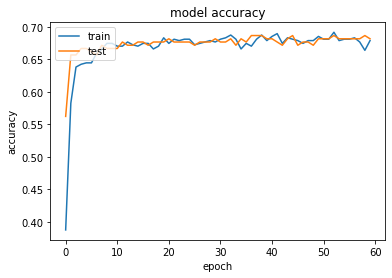

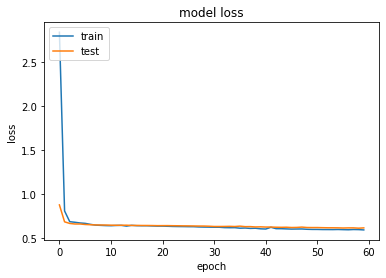

In [ ]:
# plot the history of the training

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Model Validation

In [ ]:
# get model predictions
y_pred3 = model3.predict(X_val3)
print(y_pred3[:5])

7/7 [==============================] - 0s 2ms/step
[[0.2473242 ]
 [0.3157959 ]
 [0.4328227 ]
 [0.3124152 ]
 [0.47082695]]


In [ ]:
# convert to categorical predictions
y_pred_categorical3 = [1 if pred > 0.5 else 0 for pred in y_pred3]
print(y_pred_categorical3[:5])

[0, 0, 0, 0, 0]


In [ ]:
# measure accuracy
accuracy3 = metrics.accuracy_score(y_val3, y_pred_categorical3)
print(f'Accuracy: {accuracy3}')

Accuracy: 0.681592039800995


### Test Predictions

In [ ]:
# summarise the details
print(f'Number of entries: {len(diabetes_test)}')

X_test = diabetes_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
X_test3 = X_test.iloc[:, 0:8]
X_test3.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test_pred3 = model3.predict(X_test)
print(test_pred3[:5])

test_pred_categorical3 = [1 if pred > 0.5 else 0 for pred in test_pred3]
print(test_pred_categorical3[:5])

4/4 [==============================] - 0s 3ms/step
[[0.47082695]
 [0.29233196]
 [0.43576875]
 [0.36172488]
 [0.13189626]]
[0, 0, 0, 0, 0]


## M4

## M4 Params

No of features = all

No of hidden layers = 5

Classification type = Binary class

Activations: relu, relu, relu, sigmoid

Let's build another model with the 8 features but with more hidden layers

In [ ]:
X4 = X.iloc[:, 0:8]
X4.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Training and splitting data

In [ ]:
# split data to train and validation sets
X_train4, X_val4, y_train4, y_val4 = train_test_split(X4, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train4)}')
print(f'validation data set size: {len(X_val4)}')

training data set size: 467
validation data set size: 201


Building model 4

In [ ]:
# define the keras model
model4 = keras.Sequential()
model4.add(layers.Dense(64, input_dim=8, activation='relu'))
model4.add(layers.Dense(32, activation='relu'))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(8, activation='relu'))
model4.add(layers.Dense(4, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                576       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,361
Trainable params: 3,361
Non-traina

In [ ]:
# compile the keras model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model4.fit(X_train4, y_train4, batch_size=50, epochs=60, validation_data=(X_val4, y_val4))

Epoch 1/60
10/10 [==============================] - 2s 28ms/step - loss: 0.8283 - accuracy: 0.4839 - val_loss: 0.8135 - val_accuracy: 0.5423
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 0.7122 - accuracy: 0.6403 - val_loss: 0.6485 - val_accuracy: 0.6468
Epoch 3/60
10/10 [==============================] - 0s 9ms/step - loss: 0.6829 - accuracy: 0.5846 - val_loss: 0.6565 - val_accuracy: 0.6269
Epoch 4/60
10/10 [==============================] - 0s 7ms/step - loss: 0.6350 - accuracy: 0.6338 - val_loss: 0.6168 - val_accuracy: 0.6866
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6161 - accuracy: 0.6574 - val_loss: 0.6053 - val_accuracy: 0.7164
Epoch 6/60
10/10 [==============================] - 0s 8ms/step - loss: 0.6340 - accuracy: 0.6852 - val_loss: 0.6629 - val_accuracy: 0.6517
Epoch 7/60
10/10 [==============================] - 0s 11ms/step - loss: 0.6170 - accuracy: 0.6531 - val_loss: 0.6072 - val_accuracy: 0.6716
Epoch 8/60
10/10 [

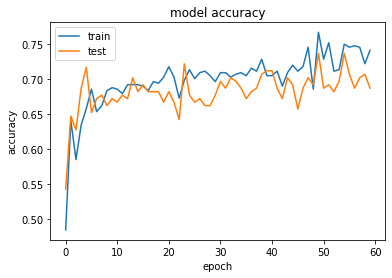

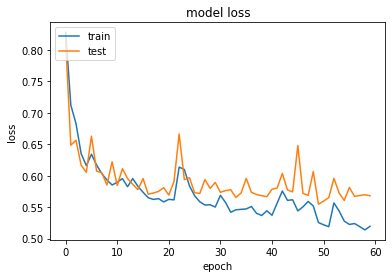

In [ ]:
# plot the history of the training

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Model Evaluation

In [ ]:
# get model predictions
y_pred4 = model4.predict(X_val4)
print(y_pred4[:5])

7/7 [==============================] - 0s 2ms/step
[[0.62361014]
 [0.70301646]
 [0.19538307]
 [0.3211195 ]
 [0.52671075]]


In [ ]:
# convert to categorical predictions
y_pred_categorical4 = [1 if pred > 0.5 else 0 for pred in y_pred4]
print(y_pred_categorical4[:5])

[1, 1, 0, 0, 1]


In [ ]:
# measure accuracy
accuracy4 = metrics.accuracy_score(y_val4, y_pred_categorical4)
print(f'Accuracy: {accuracy4}')

Accuracy: 0.6865671641791045


Test prediction

In [ ]:
# summarise the details
print(f'Number of entries: {len(diabetes_test)}')

X_test = diabetes_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      100 non-null    int64  
 1   A2      100 non-null    int64  
 2   A3      100 non-null    int64  
 3   A4      100 non-null    int64  
 4   A5      100 non-null    int64  
 5   A6      100 non-null    float64
 6   A7      100 non-null    float64
 7   A8      100 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 6.4 KB
None


In [ ]:
X_test4 = X_test.iloc[:, 0:8]
X_test4.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test_pred4 = model4.predict(X_test)
print(test_pred4[:5])

test_pred_categorical4 = [1 if pred > 0.5 else 0 for pred in test_pred4]
print(test_pred_categorical4[:5])

4/4 [==============================] - 0s 3ms/step
[[0.7000766 ]
 [0.6013632 ]
 [0.6019827 ]
 [0.42298847]
 [0.00299986]]
[1, 1, 1, 0, 0]


In [ ]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

## M4_1 - Early Stopping

<!-- [Early stopping](https://keras.io/api/callbacks/early_stopping/) stops training when a monitored metric has stopped improving. -->



Model 4_1 building

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# define the keras model
model4_1 = keras.Sequential()
model4_1.add(layers.Dense(64, input_dim=8, activation='relu'))
model4_1.add(layers.Dense(32, activation='relu'))
model4_1.add(layers.Dense(16, activation='relu'))
model4_1.add(layers.Dense(8, activation='relu'))
model4_1.add(layers.Dense(4, activation='relu'))
model4_1.add(layers.Dense(1, activation='sigmoid'))

model4_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,361
Trainable params: 3,361
Non-trainabl

Model Evaluation

In [ ]:
# compile the keras model
model4_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model with early stopping
history = model4_1.fit(X_train4, y_train4, batch_size=50, epochs=60, validation_data=(X_val4, y_val4), callbacks=[callback])

Epoch 1/60
10/10 [==============================] - 2s 28ms/step - loss: 0.6995 - accuracy: 0.6424 - val_loss: 0.6916 - val_accuracy: 0.6567
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.6531 - val_loss: 0.6903 - val_accuracy: 0.6567
Epoch 3/60
10/10 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.6531 - val_loss: 0.6890 - val_accuracy: 0.6567
Epoch 4/60
10/10 [==============================] - 0s 8ms/step - loss: 0.6885 - accuracy: 0.6531 - val_loss: 0.6876 - val_accuracy: 0.6567


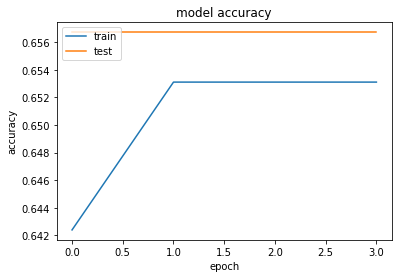

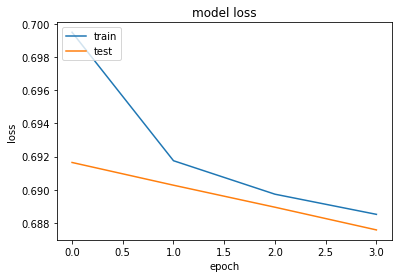

In [ ]:
# plot the history of the training

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# get model predictions
y_pred6 = model4_1.predict(X_val4)
print(y_pred6[:5])

7/7 [==============================] - 0s 2ms/step
[[0.49087176]
 [0.49087176]
 [0.49087176]
 [0.49087176]
 [0.49087176]]


In [ ]:
# convert to categorical predictions
y_pred_categorical6 = [1 if pred > 0.5 else 0 for pred in y_pred6]
print(y_pred_categorical6[:5])

[0, 0, 0, 0, 0]


In [ ]:
# measure accuracy
accuracy6 = metrics.accuracy_score(y_val4, y_pred_categorical6)
print(f'Accuracy: {accuracy6}')

Accuracy: 0.6567164179104478


Test Prediction

In [ ]:
X_test6 = X_test.iloc[:, 0:8]
X_test6.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test_pred6 = model4_1.predict(X_test)
print(test_pred6[:5])

test_pred_categorical6 = [1 if pred > 0.5 else 0 for pred in test_pred6]
print(test_pred_categorical6[:5])

4/4 [==============================] - 0s 3ms/step
[[0.49087176]
 [0.49087176]
 [0.49087176]
 [0.49087176]
 [0.49087176]]
[0, 0, 0, 0, 0]


### M4_2 Early Stopping with More Parameters

In [ ]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

Model building

In [ ]:
callback2 = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# define the keras model
model4_2 = keras.Sequential()
model4_2.add(layers.Dense(64, input_dim=8, activation='relu'))
model4_2.add(layers.Dense(32, activation='relu'))
model4_2.add(layers.Dense(16, activation='relu'))
model4_2.add(layers.Dense(8, activation='relu'))
model4_2.add(layers.Dense(4, activation='relu'))
model4_2.add(layers.Dense(1, activation='sigmoid'))

model4_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,361
Trainable params: 3,361
Non-trainabl

Model Evaluation

In [ ]:
# compile the keras model
model4_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model4_2.fit(X_train4, y_train4, batch_size=50, epochs=60, validation_data=(X_val4, y_val4), callbacks=[callback2])

Epoch 1/60
10/10 [==============================] - 1s 27ms/step - loss: 0.6995 - accuracy: 0.6424 - val_loss: 0.6916 - val_accuracy: 0.6567
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.6531 - val_loss: 0.6903 - val_accuracy: 0.6567
Epoch 3/60
10/10 [==============================] - 0s 9ms/step - loss: 0.6897 - accuracy: 0.6531 - val_loss: 0.6890 - val_accuracy: 0.6567
Epoch 4/60
10/10 [==============================] - 0s 9ms/step - loss: 0.6885 - accuracy: 0.6531 - val_loss: 0.6876 - val_accuracy: 0.6567


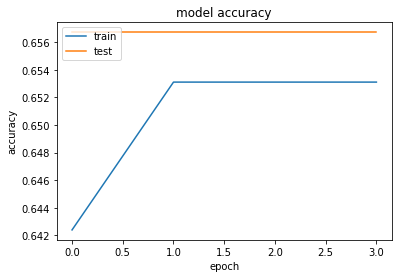

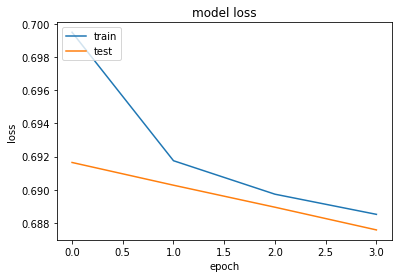

In [ ]:
# plot the history of the training

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# get model predictions
y_pred4_2 = model4_2.predict(X_val4)
print(y_pred4_2[:5])

7/7 [==============================] - 0s 2ms/step
[[0.49762544]
 [0.49762544]
 [0.49762544]
 [0.49762544]
 [0.49762544]]


In [ ]:
# convert to categorical predictions
y_pred_categorical4_2 = [1 if pred > 0.5 else 0 for pred in y_pred4_2]
print(y_pred_categorical4_2[:5])

[0, 0, 0, 0, 0]


In [ ]:
# measure accuracy
accuracy4_2 = metrics.accuracy_score(y_val4, y_pred_categorical4_2)
print(f'Accuracy: {accuracy4_2}')

Accuracy: 0.6567164179104478


In [ ]:
X_test4_2 = X_test.iloc[:, 0:8]
X_test4_2.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test_pred4_2 = model4_2.predict(X_test)
print(test_pred4_2[:5])

test_pred_categorical4_2 = [1 if pred > 0.5 else 0 for pred in test_pred4_2]
print(test_pred_categorical4_2[:5])

4/4 [==============================] - 0s 3ms/step
[[0.49762544]
 [0.49762544]
 [0.49762544]
 [0.49762544]
 [0.49762544]]
[0, 0, 0, 0, 0]


## M5

## M5 Params

No of features = all

No of hidden layers = 5

Classification type = Binary class

Activations: leakyrelu, leakyrelu, leakyrelu, sigmoid

Let's build another model with the 8 features but with 5 hidden layers and leakyrelu activation function

In [ ]:
X5 = X.iloc[:, 0:8]
X5.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Split data to training and validation

In [ ]:
# split data to train and validation sets
X_train5, X_val5, y_train5, y_val5 = train_test_split(X5, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train5)}')
print(f'validation data set size: {len(X_val5)}')

training data set size: 467
validation data set size: 201


Building Model 5

In [ ]:
# define the keras model
model5 = keras.Sequential()
model5.add(layers.Dense(64, input_dim=8, activation=LeakyReLU(alpha=0.1)))
model5.add(layers.Dense(32, activation=LeakyReLU(alpha=0.1)))
model5.add(layers.Dense(16, activation=LeakyReLU(alpha=0.1)))
model5.add(layers.Dense(8, activation=LeakyReLU(alpha=0.1)))
model5.add(layers.Dense(4, activation=LeakyReLU(alpha=0.1)))
model5.add(layers.Dense(1, activation=LeakyReLU(alpha=0.1)))

model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 3,361
Trainable params: 3,361
Non-traina

In [ ]:
# compile the keras model
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model5.fit(X_train5, y_train5, batch_size=50, epochs=60, validation_data=(X_val5, y_val5))

Epoch 1/60
10/10 [==============================] - 2s 27ms/step - loss: 7.9349 - accuracy: 0.4797 - val_loss: 8.2251 - val_accuracy: 0.4627
Epoch 2/60
10/10 [==============================] - 0s 8ms/step - loss: 6.8960 - accuracy: 0.5460 - val_loss: 7.6978 - val_accuracy: 0.4975
Epoch 3/60
10/10 [==============================] - 0s 8ms/step - loss: 6.9565 - accuracy: 0.5439 - val_loss: 7.9271 - val_accuracy: 0.4776
Epoch 4/60
10/10 [==============================] - 0s 7ms/step - loss: 6.1018 - accuracy: 0.5953 - val_loss: 5.5186 - val_accuracy: 0.6418
Epoch 5/60
10/10 [==============================] - 0s 8ms/step - loss: 5.3820 - accuracy: 0.6510 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 6/60
10/10 [==============================] - 0s 9ms/step - loss: 5.3508 - accuracy: 0.6531 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 7/60
10/10 [==============================] - 0s 8ms/step - loss: 5.3508 - accuracy: 0.6531 - val_loss: 5.2951 - val_accuracy: 0.6567
Epoch 8/60
10/10 [=

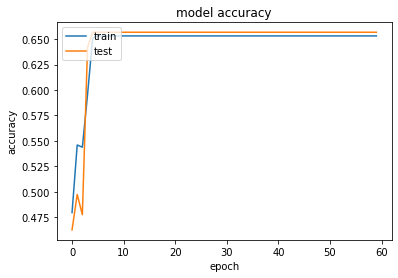

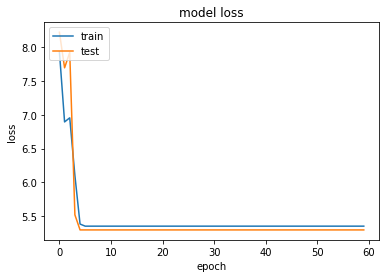

In [ ]:
# plot the history of the training

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Model Evaluation

In [ ]:
# get model predictions
y_pred5 = model5.predict(X_val5)
print(y_pred5[:5])

7/7 [==============================] - 0s 2ms/step
[[-5.6253953]
 [-5.948533 ]
 [-4.560132 ]
 [-5.7951703]
 [-6.957748 ]]


In [ ]:
# convert to categorical predictions
y_pred_categorical5 = [1 if pred > 0.5 else 0 for pred in y_pred5]
print(y_pred_categorical5[:5])

[0, 0, 0, 0, 0]


In [ ]:
# measure accuracy
accuracy5 = metrics.accuracy_score(y_val5, y_pred_categorical5)
print(f'Accuracy: {accuracy5}')

Accuracy: 0.6567164179104478


Test Prediction

In [ ]:
X_test5 = X_test.iloc[:, 0:8]
X_test5.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test_pred5 = model5.predict(X_test)
print(test_pred5[:5])

test_pred_categorical5 = [1 if pred > 0.5 else 0 for pred in test_pred5]
print(test_pred_categorical5[:5])

4/4 [==============================] - 0s 3ms/step
[[-4.531062 ]
 [-7.024118 ]
 [-7.250046 ]
 [-4.6840553]
 [-5.403083 ]]
[0, 0, 0, 0, 0]


#M8 - Using Dropout

In [ ]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(seed) # set all random seeds for the program (Python, NumPy, and TensorFlow) 

In [ ]:
X8 = X.iloc[:, 0:8]
X8.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Splitting data

In [ ]:
# split data to train and validation sets
X_train8, X_val8, y_train8, y_val8 = train_test_split(X8, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train8)}')
print(f'validation data set size: {len(X_val8)}')

training data set size: 467
validation data set size: 201


Model building

In [ ]:
# import the Dropout layer from keras
from tensorflow.keras.layers import Dropout

# create the model with a dropout layer
model8 = keras.Sequential() 
model8.add(layers.Dense(units=12, input_dim=8, activation='relu'))
# add the dropout layer here
model8.add(Dropout(0.2))
model8.add(layers.Dense(units=8,  activation='relu'))
# add the dropout layer here
model8.add(Dropout(0.2))
model8.add(layers.Dense(units=4, activation='softmax'))
model8.add(Dropout(0.2))
model8.add(layers.Dense(1, activation='sigmoid'))

model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

In [ ]:
# 1. Compile the model
model8.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model (replace the question marks)
# train model
history = model8.fit(X_train8, y_train8, batch_size=50, epochs=60, validation_data=(X_val8, y_val8))

Epoch 1/60
10/10 [==============================] - 1s 27ms/step - loss: 0.9147 - accuracy: 0.4069 - val_loss: 0.8964 - val_accuracy: 0.3433
Epoch 2/60
10/10 [==============================] - 0s 7ms/step - loss: 0.9019 - accuracy: 0.4133 - val_loss: 0.8896 - val_accuracy: 0.3433
Epoch 3/60
10/10 [==============================] - 0s 6ms/step - loss: 0.9057 - accuracy: 0.3983 - val_loss: 0.8831 - val_accuracy: 0.3433
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 0.8817 - accuracy: 0.4197 - val_loss: 0.8767 - val_accuracy: 0.3433
Epoch 5/60
10/10 [==============================] - 0s 8ms/step - loss: 0.8890 - accuracy: 0.4047 - val_loss: 0.8703 - val_accuracy: 0.3433
Epoch 6/60
10/10 [==============================] - 0s 8ms/step - loss: 0.8877 - accuracy: 0.3919 - val_loss: 0.8641 - val_accuracy: 0.3433
Epoch 7/60
10/10 [==============================] - 0s 7ms/step - loss: 0.8777 - accuracy: 0.4047 - val_loss: 0.8580 - val_accuracy: 0.3433
Epoch 8/60
10/10 [=

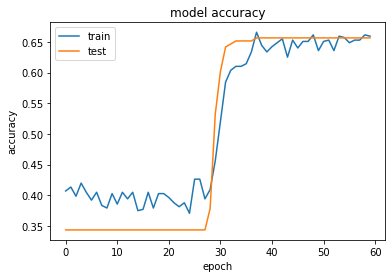

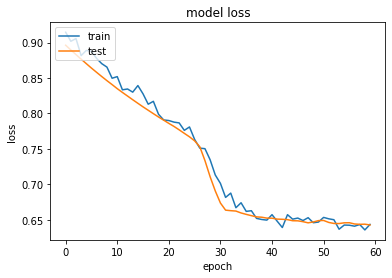

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Model Evaluation

In [ ]:
# get model predictions
y_pred8 = model8.predict(X_val8)
print(y_pred8[:5])

7/7 [==============================] - 0s 2ms/step
[[0.328579  ]
 [0.45665285]
 [0.4081702 ]
 [0.36125988]
 [0.43745774]]


In [ ]:
# convert to categorical predictions
y_pred_categorical8 = [1 if pred > 0.5 else 0 for pred in y_pred8]
print(y_pred_categorical8[:5])

[0, 0, 0, 0, 0]


In [ ]:
# measure accuracy
accuracy8 = metrics.accuracy_score(y_val8, y_pred_categorical8)
print(f'Accuracy: {accuracy8}')

Accuracy: 0.6567164179104478


Test Prediction

In [ ]:
X_test8 = X_test.iloc[:, 0:8]
X_test8.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test_pred8 = model8.predict(X_test)
print(test_pred8[:5])

test_pred_categorical8 = [1 if pred > 0.5 else 0 for pred in test_pred8]
print(test_pred_categorical8[:5])

4/4 [==============================] - 0s 3ms/step
[[0.437742  ]
 [0.3776532 ]
 [0.4165116 ]
 [0.36064276]
 [0.36255166]]
[0, 0, 0, 0, 0]


## M9 - Applying regularizer

In [ ]:
X9 = X.iloc[:, 0:8]
X9.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train9, X_val9, y_train9, y_val9 = train_test_split(X9, y, test_size=0.3, random_state=100)

# Define the model
model9 = keras.Sequential()
model9.add(layers.Dense(12, input_dim=8, activation='relu'))
model9.add(layers.BatchNormalization())
model9.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model9.add(layers.Dropout(0.2))
model9.add(layers.Dense(4, activation='relu'))
model9.add(layers.Dense(1, activation='sigmoid'))

model9.summary()

# Compile the model
model9.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model9.fit(X_train9, y_train9, epochs=100, batch_size=50, validation_data=(X_val9, y_val9))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                108       
                                                                 
 batch_normalization_2 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 4)                 36        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                      

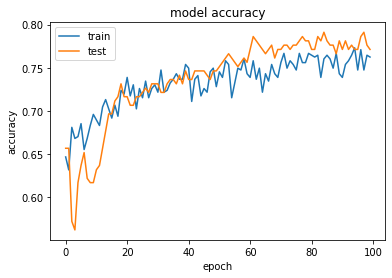

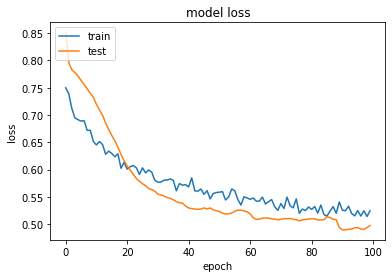

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Model 9 Evaluation

In [ ]:
# get model predictions
y_pred9 = model9.predict(X_val8)
print(y_pred9[:5])

7/7 [==============================] - 0s 2ms/step
[[0.1340486 ]
 [0.36718914]
 [0.15757553]
 [0.11732362]
 [0.68135756]]


In [ ]:
# convert to categorical predictions
y_pred_categorical9 = [1 if pred > 0.5 else 0 for pred in y_pred9]
print(y_pred_categorical9[:5])

[0, 0, 0, 0, 1]


In [ ]:
# measure accuracy
accuracy9 = metrics.accuracy_score(y_val9, y_pred_categorical9)
print(f'Accuracy: {accuracy9}')

Accuracy: 0.7711442786069652


Test prediction

In [ ]:
X_test9 = X_test.iloc[:, 0:8]
X_test9.head()

,A1,A2,A3,A4,A5,A6,A7,A8
0,6,98,58,33,190,34.0,0.430,43
1,9,154,78,30,100,30.9,0.164,45
2,6,165,68,26,168,33.6,0.631,49
3,1,99,58,10,0,25.4,0.551,21
4,10,68,106,23,49,35.5,0.285,47


In [ ]:
test_pred9 = model9.predict(X_test)
print(test_pred9[:5])

test_pred_categorical9 = [1 if pred > 0.5 else 0 for pred in test_pred9]
print(test_pred_categorical9[:5])

4/4 [==============================] - 0s 3ms/step
[[0.24877411]
 [0.6047975 ]
 [0.6996074 ]
 [0.07891393]
 [0.15986964]]
[0, 1, 1, 0, 0]


## Creating the submission data

In [ ]:
# create data frame for submission
df_test = pd.DataFrame(diabetes_test['id'])
df_test['prediction'] = test_pred_categorical9

In [ ]:
# save data frame to .csv file
df_test.to_csv('/content/drive/MyDrive/AppliedAI/Assessment 4/diabetes_prediction2.csv', index=False)

In [ ]:
import json

import pandas as pd

test_file_path = '/content/drive/MyDrive/AppliedAI/Assessment 4/diabetes_prediction2.csv'
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': int(row['id']), 'prediction': int(row['prediction'])})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 1, 'prediction': 0}, {'id': 2, 'prediction': 1}, {'id': 3, 'prediction': 1}, {'id': 4, 'prediction': 0}, {'id': 5, 'prediction': 0}]
